<a href="https://colab.research.google.com/github/ygmurkara/DI501/blob/main/DI_501_Lab_1_with_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DI 501 - Introduction to Data Informatics
### Intro to data exploration (pandas, matplotlib, seaborn, scipy)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from scipy.stats import spearmanr, pearsonr
from statsmodels.stats.multitest import multipletests
pd.set_option('display.max_columns', None)


## Loading data

To easily locate files you can put them in the same folder as the notebook file. Otherwise enter the path to the file.

In [ ]:
data = pd.read_csv('2024 QS World University Rankings 1.1 (For qs.com).csv')
data.head()

,2024 QS World University Rankings;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,2024;2023;Institution Name;Location;;Classific...
1,RANK;RANK;;;Location;SIZE;FOCUS;RES.;AGE;STATU...
2,rank display;rank display2;institution;locatio...
3,1;1;Massachusetts Institute of Technology (MIT...
4,2;2;University of Cambridge;UK;United Kingdom;...


Sometimes default parameters in functions don't work for us. Here, we need to change the seperator using the `sep` argument.

In [ ]:
data = pd.read_csv('2024 QS World University Rankings 1.1 (For qs.com).csv', sep=';')
data.head()

,2024 QS World University Rankings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,2024,2023,Institution Name,Location,NaN,Classification,NaN,NaN,NaN,NaN,Academic Reputation,NaN,Employer Reputation,NaN,Faculty Student,NaN,Citations per Faculty,NaN,International Faculty,NaN,International Students,NaN,International Research Network,NaN,Employment Outcomes,NaN,Sustainability,NaN,Overall
1,RANK,RANK,NaN,NaN,Location,SIZE,FOCUS,RES.,AGE,STATUS,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,Score,Rank,SCORE
2,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,ar score,ar rank,er score,er rank,fsr score,fsr rank,cpf score,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
3,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,100.0,4,100.0,2,100.0,16,100.0,4,100.0,56,88.2,128,94.3,58,100,4,95.2,51,100.0
4,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,100.0,3,100.0,4,100.0,14,92.3,68,100.0,64,95.8,85,99.9,7,100,6,97.3,33=,99.2


Here we see some columns at the top are not needed. To look at all the arguments a function has, and get more info about it we can append or prepend `?` to the function call, or visit the defined [page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) in the package webpage/repository.

In [ ]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

We can see we have an argument named `skiprows`. Lets change it to skip the first 3 rows.

In [ ]:
data = pd.read_csv('2024 QS World University Rankings 1.1 (For qs.com).csv', sep=';', skiprows=3)
data.head(3)

,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,ar score,ar rank,er score,er rank,fsr score,fsr rank,cpf score,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5.0,B,100.0,4,100.0,2,100.0,16,100.0,4,100.0,56,88.2,128,94.3,58,100.0,4,95.2,51,100.0
1,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5.0,A,100.0,3,100.0,4,100.0,14,92.3,68,100.0,64,95.8,85,99.9,7,100.0,6,97.3,33=,99.2
2,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5.0,A,100.0,2,100.0,5,100.0,8,90.6,73,98.2,110,98.2,60,100.0,1,100.0,3,97.8,26=,98.9


All looks good. We have columns with names, acronyms, and numbers. We can see all column names by accessing the `columns` attribute of the pandas dataframe.

### Unifying column names

In [ ]:
data.columns

Index(['rank display', 'rank display2', 'institution', 'location code',
       'location', 'size', 'focus', 'research', 'age band', 'status',
       'ar score', 'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank',
       'cpf score', 'cpf rank', 'ifr score', 'ifr rank', 'isr score',
       'isr rank', 'irn score', 'irn rank', 'ger score', 'ger rank',
       'SUS SCORE', 'SUS RANK', 'Overall Score'],
      dtype='object')

Notice how some columns are all uppercase, and others have each word capitalized. For further analysis it is beneficial to convert all column names to lowercase strings.

They also have spaces which will make referring to them cumbersome, so we will replace them with an underscore as well.

In [ ]:
data.columns = [x.lower().replace(' ', '_') for x in data.columns]

data.columns

Index(['rank_display', 'rank_display2', 'institution', 'location_code',
       'location', 'size', 'focus', 'research', 'age_band', 'status',
       'ar_score', 'ar_rank', 'er_score', 'er_rank', 'fsr_score', 'fsr_rank',
       'cpf_score', 'cpf_rank', 'ifr_score', 'ifr_rank', 'isr_score',
       'isr_rank', 'irn_score', 'irn_rank', 'ger_score', 'ger_rank',
       'sus_score', 'sus_rank', 'overall_score'],
      dtype='object')

But these acronyms don't mean much. Below is a list of explanations for most of the rows compiled from various pages from QS webpages.

## QS World University Rankings Explained

* **Academic reputation** – Accounting for 30 per cent of the overall score, academic reputation looks at the teaching and research quality at the world’s universities. We collate over 130,000 expert opinions from the higher education space, creating the largest survey of academic opinion in the world.  

* **Employer reputation** – We know that students want to graduate with the skills and knowledge required for the employment market. We assess how institutions prepare students for successful careers, and which institutions provide the most competent, innovative, and effective graduates.  

* **Faculty/student ratio** – This indicator recognises that a high number of academics per student reduces the teaching burden and creates a more supportive student experience. We assess how institutions provide students with meaningful access to lecturers and tutors.  

* **Citations per faculty** – We measure university research quality with a citation per faculty metric, taking the total number of academic citations in papers produced by a university in a five-year period.

* **International student ratio & International faculty ratio** – A highly international university creates a number of benefits. It demonstrates the ability to attract quality students and staff from across the world, and it implies a highly global outlook. Strong international institutions provide a multinational environment, building international sympathies and global awareness.

* **International research network** - IRN Index reflects the ability of institutions to diversify the geography of their international research network by establishing sustainable research partnerships with other higher education institutions.

* **Graduate employment rate** - Defined as the percentage of graduates who go on to paid (non-voluntary) work within 15 months of finishing their degree. We consider any mode of employment (full-time or part-time), even if unknown.

* **Sustainability** - Measures which institutions are demonstrating a commitment to a more sustainable existence. More than just the commitment, it looks for outwards evidence of this - from the impact that alumni are making in science and technology to solve climate issues, to the impact of research being done across the UN's 17 sustainable development goals.  It evaluates the social and environmental impact of universities as a center's of education and research, as well as a major employers with the operational sustainability challenges of any large and complex organization.


### Weights for overall rank

| Performances Lenses            | 2024 Edition Weights  | Change from previous editions |
|--------------------------------|-----------------------|-------------------------------|
| Academic Reputation            | 30%                   | 10% deducted                  |
| Employer Reputation            | 15%                   | 5% added                      |
| Faculty Student Ratio          | 10%                   | 10% deducted                  |
| Citations per Faculty          | 20%                   | No change                     |
| International Faculty Ratio    | 5%                    | No change                     |
| International Student Ratio    | 5%                    | No change                     |
| International Research Network | 5%                    | New                           |
| Employment Outcomes            | 5%                    | New                           |
| Sustainability                 | 5%                    | New                           |

### Classification columns

<table>

<td>

|    | Size        | Students         |
|----|-------------|------------------|
| XL | Extra Large | >=30,000 |
| L  | Large       | >=12,000         |
| M  | Medium      | >=5,000          |
| S  | Small       | <5,000 |

</td>
<td>

|    | Focus              | Faculty Area                         |
|----|--------------------|--------------------------------------|
| FC | Full comprehensive | All 5 faculty areas + medical school |
| CO | Comprehensive      | All 5 faculty areas                  |
| FO | Focused            | 3 or 4 faculty areas                 |
| SP | Specialist         | 2 or fewer faculty areas             |

</td>
<td>

|   | Classification | Age                    |
|---|----------------|------------------------|
| 5 | Historic       | >=100 years old        |
| 4 | Mature         | 50-99 years old        |
| 3 | Established    | 25-49 years old        |
| 2 | Young          | 10-24 years old        |
| 1 | New            | < 10 years old |

</td>
<td>

|    | Research Intensity |
|----|--------------------|
| VH | Very High          |
| HI | High               |
| MD | Medium             |
| LO | Low                |

</td>
</table>


Sources: <br>
https://www.topuniversities.com/qs-world-university-rankings/methodology <br>
https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings <br>
https://support.qs.com/hc/en-gb/articles/6107352412828-QS-World-University-Rankings-Sustainability- <br>
https://support.qs.com/hc/en-gb/articles/6478203732380-2024-Rankings-Cycle <br>
https://support.qs.com/hc/en-gb/articles/360021876820-QS-Institution-Classifications

## Initial exploration

Before delving into details, we can quickly have an idea about our dataset with these two methods:

* `.info()` method shows information like how many rows and columns there are, how many non NaN values exist, which object types python chose for each column etc.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank_display   1497 non-null   object 
 1   rank_display2  1415 non-null   object 
 2   institution    1497 non-null   object 
 3   location_code  1497 non-null   object 
 4   location       1497 non-null   object 
 5   size           1474 non-null   object 
 6   focus          1496 non-null   object 
 7   research       1410 non-null   object 
 8   age_band       1471 non-null   float64
 9   status         1455 non-null   object 
 10  ar_score       1497 non-null   float64
 11  ar_rank        1497 non-null   object 
 12  er_score       1496 non-null   float64
 13  er_rank        1496 non-null   object 
 14  fsr_score      1473 non-null   float64
 15  fsr_rank       1473 non-null   object 
 16  cpf_score      1473 non-null   float64
 17  cpf_rank       1473 non-null   object 
 18  ifr_scor

* `.describe()` method meanwhile calculates descriptive statistics for numeric columns.

In [ ]:
data.describe()

,age_band,ar_score,er_score,fsr_score,cpf_score,ifr_score,isr_score,irn_score,ger_score,sus_score
count,1471.000000,1497.000000,1496.000000,1473.000000,1473.000000,1371.000000,1417.000000,1493.000000,1473.000000,1397.000000
mean,3.996601,20.136540,19.812032,28.627902,23.929124,30.952662,25.585674,23.982920,19.998099,25.429349
std,0.969951,22.372692,23.771735,27.842005,28.051836,34.243906,30.868941,30.376341,20.235225,31.014888
min,1.000000,1.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,6.000000,4.075000,7.500000,2.800000,4.300000,3.000000,1.200000,8.200000,1.400000
50%,4.000000,10.900000,9.450000,16.700000,10.400000,13.100000,9.900000,6.900000,11.700000,8.400000
75%,5.000000,23.100000,25.550000,41.900000,37.900000,52.600000,38.200000,40.400000,22.400000,42.600000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Notice how only numeric attributes were considered for this function. Although for columns like 'age band' these metrics don't make sense as it is an **ordinal** attribute.

Let's focus on turkish universities for a bit. We can subset the dataset like so:

In [ ]:
turkey = data[data['location_code'] == 'TR']
turkey.head()

,rank_display,rank_display2,institution,location_code,location,size,focus,research,age_band,status,ar_score,ar_rank,er_score,er_rank,fsr_score,fsr_rank,cpf_score,cpf_rank,ifr_score,ifr_rank,isr_score,isr_rank,irn_score,irn_rank,ger_score,ger_rank,sus_score,sus_rank,overall_score
337,=336,501-510,Middle East Technical University,TR,Turkey,L,CO,VH,4.0,A,29.0,299,63.7,125,9.0,701+,22.2,525,11.3,701+,17.4,583,32.2,443,24.6,339,84.8,120=,32.2
404,=404,601-650,Istanbul Technical University,TR,Turkey,L,FO,VH,5.0,A,24.2,357,60.4,131,12.1,701+,13.3,674,7.3,701+,18.3,569,37.2,398,23.0,365,63.1,232=,27.6
431,=431,477=,Koç University,TR,Turkey,M,FC,HI,3.0,B,22.4,393,47.3,187,24.0,591,28.6,448,27.3,504,11.2,687,6.4,701+,11.0,701+,29.9,449=,26.2
503,=502,561-570,Bilkent University,TR,Turkey,M,CO,VH,3.0,B,22.2,396,44.9,196,17.2,701+,12.9,679,72.0,264,5.7,701+,4.1,701+,14.3,588,14.2,621=,23.1
515,=514,701-750,Boğaziçi University,TR,Turkey,L,CO,HI,5.0,A,23.0,378,58.4,138,4.0,701+,14.3,649,11.1,701+,2.6,701+,4.9,701+,52.7,121,6.2,701+,22.7


Another way to do the same thing is to use the query method. Note: we would've needed need backticks for variable names with spaces, but we avoided that with the underscores.

In [ ]:
data.query('location_code == "TR"').head()

,rank_display,rank_display2,institution,location_code,location,size,focus,research,age_band,status,ar_score,ar_rank,er_score,er_rank,fsr_score,fsr_rank,cpf_score,cpf_rank,ifr_score,ifr_rank,isr_score,isr_rank,irn_score,irn_rank,ger_score,ger_rank,sus_score,sus_rank,overall_score
337,=336,501-510,Middle East Technical University,TR,Turkey,L,CO,VH,4.0,A,29.0,299,63.7,125,9.0,701+,22.2,525,11.3,701+,17.4,583,32.2,443,24.6,339,84.8,120=,32.2
404,=404,601-650,Istanbul Technical University,TR,Turkey,L,FO,VH,5.0,A,24.2,357,60.4,131,12.1,701+,13.3,674,7.3,701+,18.3,569,37.2,398,23.0,365,63.1,232=,27.6
431,=431,477=,Koç University,TR,Turkey,M,FC,HI,3.0,B,22.4,393,47.3,187,24.0,591,28.6,448,27.3,504,11.2,687,6.4,701+,11.0,701+,29.9,449=,26.2
503,=502,561-570,Bilkent University,TR,Turkey,M,CO,VH,3.0,B,22.2,396,44.9,196,17.2,701+,12.9,679,72.0,264,5.7,701+,4.1,701+,14.3,588,14.2,621=,23.1
515,=514,701-750,Boğaziçi University,TR,Turkey,L,CO,HI,5.0,A,23.0,378,58.4,138,4.0,701+,14.3,649,11.1,701+,2.6,701+,4.9,701+,52.7,121,6.2,701+,22.7


(array([16.,  5.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 6.9 , 11.48, 16.06, 20.64, 25.22, 29.8 , 34.38, 38.96, 43.54,
        48.12, 52.7 ]),
 <BarContainer object of 10 artists>)

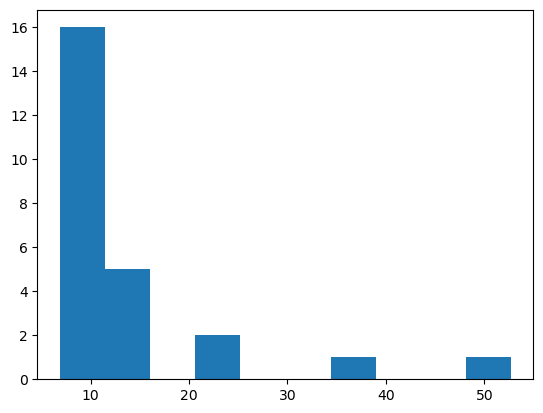

In [ ]:
plt.hist(turkey['ger_score'])

We can see the histogram function returns two arrays and a plot. One array is the bar heights and the other is the bin end point.

But of course we can use different arguments to change how many bins there are, or how much the binwidth should be.

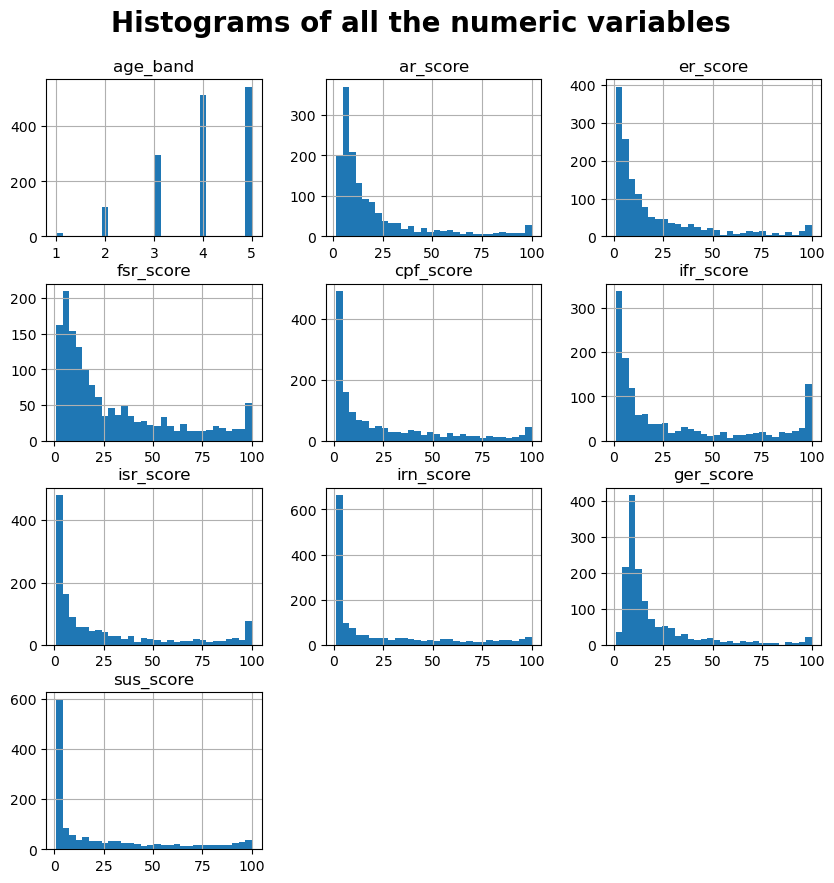

In [ ]:
data.hist(figsize=(10,10), bins=30);
plt.suptitle('Histograms of all the numeric variables', y=0.95, fontsize=20, fontweight='semibold');

Returning to the distribution of graduate employment rate for Turkey we can make custom graphs using matplotlib and an extension to it, **seaborn**.

Notice how the `kde` parameter added a kernel estimated density function on top.

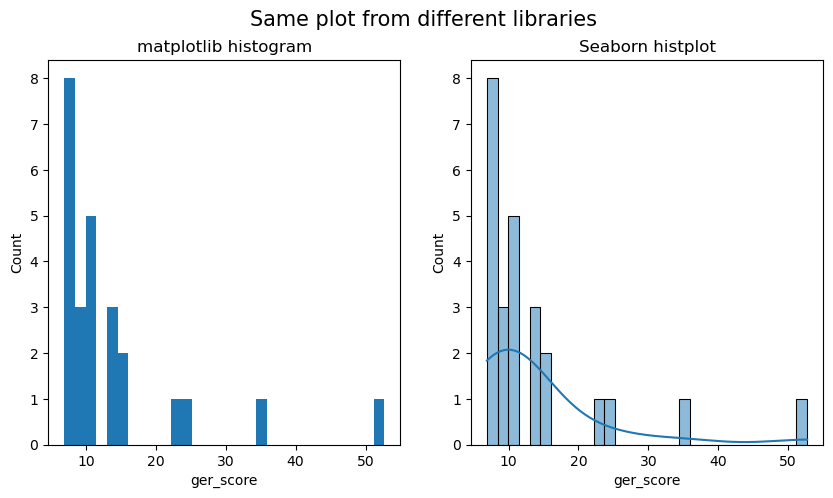

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Same plot from different libraries', size=15)

axes[0].set_xlabel('ger_score')
axes[0].set_ylabel('Count')
axes[0].set_title('matplotlib histogram')
axes[0].hist(x=turkey['ger_score'], bins=30);

axes[1].set_title('Seaborn histplot')
sns.histplot(turkey['ger_score'], kde=True, bins=30, ax=axes[1]);

As you may recall we had rank columns identified as an "object" and the scores as "float64".

In [ ]:
data.columns

Index(['rank_display', 'rank_display2', 'institution', 'location_code',
       'location', 'size', 'focus', 'research', 'age_band', 'status',
       'ar_score', 'ar_rank', 'er_score', 'er_rank', 'fsr_score', 'fsr_rank',
       'cpf_score', 'cpf_rank', 'ifr_score', 'ifr_rank', 'isr_score',
       'isr_rank', 'irn_score', 'irn_rank', 'ger_score', 'ger_rank',
       'sus_score', 'sus_rank', 'overall_score'],
      dtype='object')

In [ ]:
import re
rank_cols = {x for x in data.columns if x.endswith('rank')}
rank_cols2 = {x for x in data.columns if re.findall('rank', x)}

assert rank_cols == rank_cols2



AssertionError: 

In [ ]:
rank_cols2-rank_cols

{'rank_display', 'rank_display2'}

While this was a good exercise we actually want to keep the rank display columns as they give information on how universities changed rank from 2023 to 2024.

### Fixing rank columns

As you may recall we had rank columns identified as an "object" and the scores as "float64". We can easily recover rank from the score by sorting, so we will remove them.

In [ ]:
simplified = data.iloc[:,~data.columns.isin(rank_cols)]

simplified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank_display   1497 non-null   object 
 1   rank_display2  1415 non-null   object 
 2   institution    1497 non-null   object 
 3   location_code  1497 non-null   object 
 4   location       1497 non-null   object 
 5   size           1474 non-null   object 
 6   focus          1496 non-null   object 
 7   research       1410 non-null   object 
 8   age_band       1471 non-null   float64
 9   status         1455 non-null   object 
 10  ar_score       1497 non-null   float64
 11  er_score       1496 non-null   float64
 12  fsr_score      1473 non-null   float64
 13  cpf_score      1473 non-null   float64
 14  ifr_score      1371 non-null   float64
 15  isr_score      1417 non-null   float64
 16  irn_score      1493 non-null   float64
 17  ger_score      1473 non-null   float64
 18  sus_scor

### **Question 1)**

Using pandas series method [`str.extract`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html) and an appropriate [regular expression](https://images.datacamp.com/image/upload/v1665049611/Marketing/Blog/Regular_Expressions_Cheat_Sheet.pdf) pattern convert the `rank_display` column to pure integers by extracting the digits.

In [ ]:
# fill here #

In [ ]:
simplified['rank_display'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '=17', '=19', '21', '22', '23', '24', '25',
       '=26', '28', '29', '30', '32', '33', '=34', '36', '37', '=38',
       '40', '41', '42', '43', '=44', '45', '46', '=47', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '=65', '67', '68', '69', '70', '71', '72', '=73', '75',
       '=76', '78', '79', '80', '=81', '83', '84', '=85', '=87', '89',
       '90', '=91', '=93', '=95', '97', '98', '99', '=100', '102', '103',
       '104', '105', '106', '=107', '109', '110', '111', '112', '113',
       '114', '115', '116', '117', '118', '119', '120', '121', '122',
       '123', '=124', '=126', '128', '129', '=130', '=132', '=134', '136',
       '=137', '139', '140', '=141', '=143', '=145', '148', '=149',
       '=151', '153', '=154', '158', '=159', '162', '163', '=164', '167',
       '168', '=169', '=171', '=173', '=176', '179', '=180', '182

In [ ]:
simplified['rank_display'].str.extract('=?(\d*)').astype(int)

,0
0,1
1,2
2,3
3,4
4,5
...,...
1492,1401
1493,1401
1494,1401
1495,1401


**Breakdown of the Regex Pattern:** <br>
=? → The = sign is optional (? makes it optional).<br>
(\d*) → Captures a sequence of digits (\d*) in a group (())<br>
\d* → Matches zero or more digits (0-9).<br>
The parentheses () create a capture group to extract the numeric part.<br>


In [ ]:
simplified.loc[:,'rank_display'] = simplified['rank_display'].str.extract('=?(\d*)').values

simplified.loc[:,'rank_display2'] = simplified['rank_display2'].str.extract('=?(\d*)').values


In [ ]:
simplified.dtypes

rank_display      object
rank_display2     object
institution       object
location_code     object
location          object
size              object
focus             object
research          object
age_band         float64
status            object
ar_score         float64
er_score         float64
fsr_score        float64
cpf_score        float64
ifr_score        float64
isr_score        float64
irn_score        float64
ger_score        float64
sus_score        float64
overall_score     object
dtype: object

In [ ]:
simplified.rank_display = simplified.rank_display.astype('int')

simplified.rank_display2 = simplified.rank_display2.astype('float')

/var/folders/5p/rbnmtvhx5437fb_9sp9b1ln80000gn/T/ipykernel_23913/3616505491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified.rank_display = simplified.rank_display.astype('int')
/var/folders/5p/rbnmtvhx5437fb_9sp9b1ln80000gn/T/ipykernel_23913/3616505491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified.rank_display2 = simplified.rank_display2.astype('float')


### **Question 2)**

In the above code, try converting `rank_display2` to an integer. If you encounter an error, analyze why `rank_display2` was cast as a float while rank_display was successfully converted to an integer.

In [ ]:
# fill here #

> Fill here by double clicking me!

In [ ]:
print(simplified['rank_display'].isnull().sum())
print(simplified['rank_display2'].isnull().sum())

0
82


In Pandas, when trying to convert a column to an integer (int) data type, an error occurs if there are NaN (missing) values.
This is because:
NaN values are of type float, and the integer data type does not support NaN values.

### Fixing overall score column

In [ ]:
simplified['overall_score'].unique()

array(['100.0', '99.2', '98.9', '98.3', '98.1', '97.8', '93.3', '92.7',
       '92.4', '90.4', '90.3', '89.4', '89.3', '87.9', '87.8', '87.7',
       '87.0', '86.7', '86.3', '86.1', '85.9', '85.8', '84.9', '84.5',
       '84.3', '83.8', '83.7', '82.2', '81.7', '81.5', '80.4', '80.0',
       '79.5', '79.3', '78.5', '78.2', '78.1', '77.8', '76.9', '76.3',
       '76.2', '74.4', '74.3', '73.7', '73.4', '72.5', '72.4', '72.2',
       '72.0', '71.8', '71.7', '71.1', '70.1', '70.0', '69.2', '69.1',
       '68.7', '68.6', '68.0', '67.9', '67.7', '67.6', '66.9', '66.4',
       '65.5', '65.2', '65.1', '64.7', '63.9', '63.5', '63.1', '63.0',
       '62.8', '62.2', '62.0', '61.8', '61.6', '61.4', '61.0', '60.9',
       '60.8', '60.7', '60.4', '60.0', '59.9', '59.7', '59.4', '59.3',
       '58.8', '58.7', '58.6', '58.3', '58.1', '58.0', '57.4', '57.2',
       '57.1', '56.9', '56.8', '56.4', '56.3', '56.2', '55.7', '55.2',
       '55.0', '54.8', '54.2', '54.0', '53.7', '53.2', '52.9', '52.7',
     

In [ ]:
simplified.overall_score = simplified['overall_score'].replace('-', np.NaN).astype(float)

/var/folders/5p/rbnmtvhx5437fb_9sp9b1ln80000gn/T/ipykernel_23913/726427996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified.overall_score = simplified['overall_score'].replace('-', np.NaN).astype(float)


### Fixing age band column

In [ ]:
simplified['age_band'].unique()

array([ 5.,  3.,  4.,  1.,  2., nan])

In [ ]:
simplified.loc[:,'age_band'] = simplified['age_band'].astype('object').values

/var/folders/5p/rbnmtvhx5437fb_9sp9b1ln80000gn/T/ipykernel_23913/3287710797.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5.0 5.0 5.0 ... 5.0 5.0 nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  simplified.loc[:,'age_band'] = simplified['age_band'].astype('object').values


## Location Based Inference

We might get tempted to compare global trends using countries, but we have more than 100 unique countries listed here.

In [ ]:
len(simplified.location.unique())

104

Most of our instances come from the US, UK and China.

In [ ]:
simplified.location.value_counts()

location
United States       199
United Kingdom       90
China (Mainland)     71
Japan                50
Germany              49
                   ... 
Puerto Rico           1
Cyprus                1
Ethiopia              1
Kyrgyzstan            1
Armenia               1
Name: count, Length: 104, dtype: int64

We can access the raw numbers inside a pandas series (shown above) by accessing their values.

This highlights the fact that pandas dataframes are wrapped around numpy arrays.

In [ ]:
simplified.location.value_counts().values

array([199,  90,  71,  50,  49,  48,  45,  43,  42,  38,  35,  35,  35,
        32,  31,  28,  27,  26,  25,  25,  25,  25,  22,  21,  16,  16,
        15,  15,  14,  13,  13,  13,  11,  11,  11,  11,  11,  11,  10,
         9,   9,   9,   8,   8,   8,   8,   8,   8,   8,   7,   7,   7,
         6,   6,   5,   5,   5,   5,   5,   5,   4,   4,   4,   4,   4,
         4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

Instead of country based aggregation, we can add a higher order category, like which continent that country belongs to, and then we can group the data based on continent and compare inter-continent countries, or we can compare continents themselves.

You'd need to uncomment the lines below and run them if you don't have the pycountry package in your environment.

In [ ]:
# !pip install pycountry
# !pip install pycountry_convert

In [ ]:
import pycountry
from pycountry_convert import country_alpha2_to_continent_code

In [ ]:
country_alpha2_to_continent_code('TR')

'AS'

This function is basically a dictionary where each country's abbreviation is mapped to a continent.

The library is more extensive than this though, as it covers countries official names, and even flags with emojis.

In [ ]:
pycountry.countries.get(name='United Kingdom')

Country(alpha_2='GB', alpha_3='GBR', flag='🇬🇧', name='United Kingdom', numeric='826', official_name='United Kingdom of Great Britain and Northern Ireland')

If we were to apply this function to our location code column we would get an error because the United Kingdom is coded as UK in this dataset.

In [ ]:
simplified.iloc[1,:5]

rank_display                           2
rank_display2                        2.0
institution      University of Cambridge
location_code                         UK
location                  United Kingdom
Name: 1, dtype: object

We can replace instances of UK with GB using the replace method of pandas dataframes.

In [ ]:
simplified.loc[:, 'location_code'] = simplified['location_code'].replace('UK', 'GB')

Now we can apply our function to our location code column to get continents.

In [ ]:
simplified.loc[:,'continent'] = simplified['location_code'].apply(country_alpha2_to_continent_code)

/var/folders/5p/rbnmtvhx5437fb_9sp9b1ln80000gn/T/ipykernel_23913/2375614422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified.loc[:,'continent'] = simplified['location_code'].apply(country_alpha2_to_continent_code)


In [ ]:
simplified[['continent', 'location_code']].head()

,continent,location_code
0,NA,US
1,EU,GB
2,EU,GB
3,NA,US
4,NA,US


Small note about violin plots: the kernel bandwidth parameter `bw` determines how smooth or rugged the graph is.
ar score=academic reputation

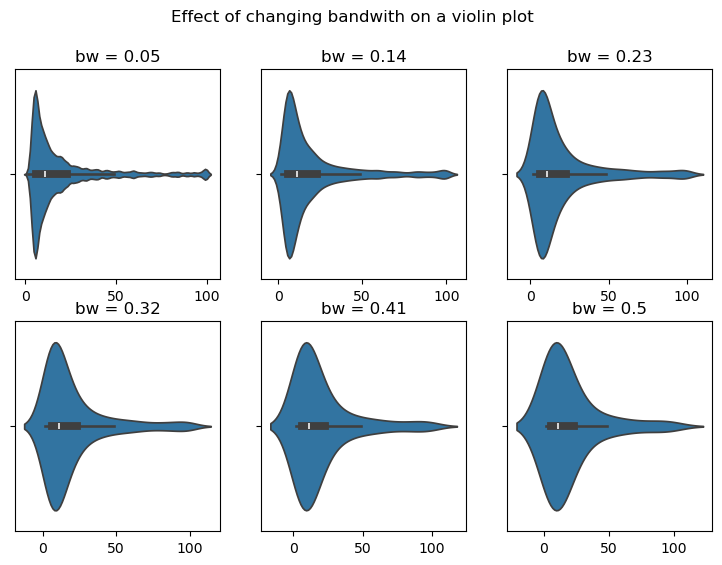

In [ ]:
bw = np.linspace(0.05,0.5,6)

fig, axes = plt.subplots(2,3,figsize=(9,6))
fig.suptitle('Effect of changing bandwith on a violin plot')

for i,j in zip(axes.flatten(),bw):
    sns.violinplot(x=simplified['ar_score'], ax=i, bw_method=j)
    i.set_xlabel('')
    i.set_title(f'bw = {np.round(j,2)}')

For large datasets (thousands of observations): Use a small bw (e.g., 0.05-0.2) to reveal finer details.<br>
For small datasets: Use a larger bw (e.g., 0.2-0.3) for a cleaner, more general shape.<br>
A good starting point: bw=0.2 or using "scott" for automatic selection.

### Inference from data

Now let's use our new continent variable to aggregate data and show various variables' spreads.

As a side note we can use different themes for our matplotlib plots. More can be found [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

In [ ]:
plt.style.use('fivethirtyeight')


<Axes: xlabel='ar_score', ylabel='continent'>

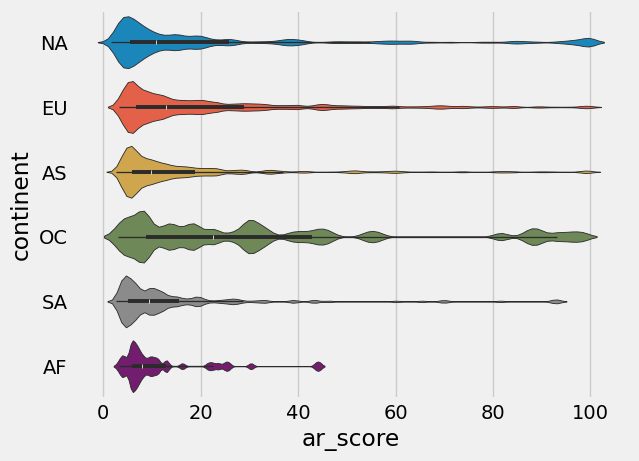

In [ ]:
sns.violinplot(data=simplified, x='ar_score', y='continent',
               hue='continent', bw_method=0.05)

There's a trend of high academic reputation among north american and oceanean universities, with long extending tails going up a bit towards the 100 score mark.

ger_score= Graduate employment rate

In [ ]:
plt.style.use('default')

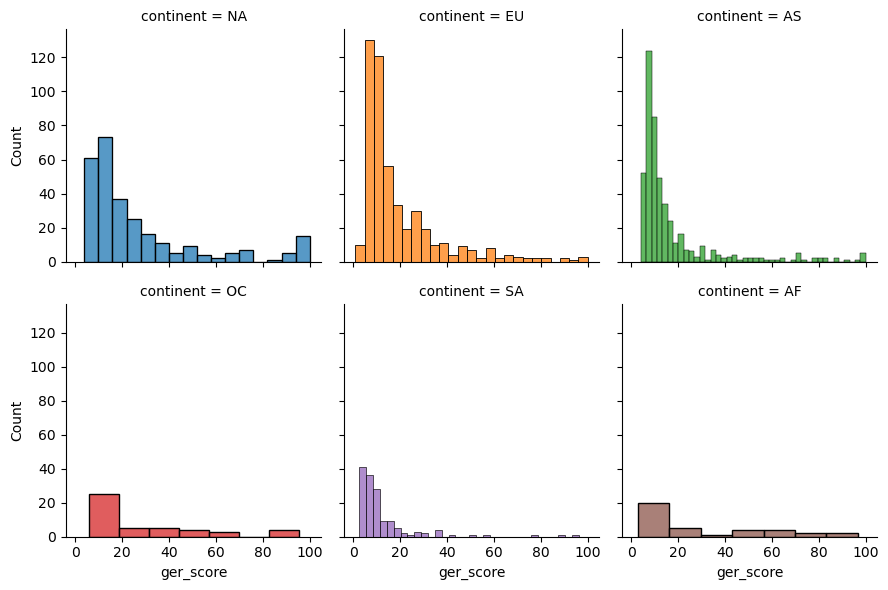

In [ ]:
g = sns.FacetGrid(simplified, col="continent",
                  hue="continent", col_wrap=3)

g.map_dataframe(sns.histplot, x="ger_score");

On the other hand there were quite a bit of universities with high graduate employment rate in Africa and Oceania that isn't as prevalent in other continents.

With this we can also subset our data such that only countries from a certain continent are present. Then we can look at individual countries within a continent and have a concise grahp as opposed to all 100 countries being plotted at once.

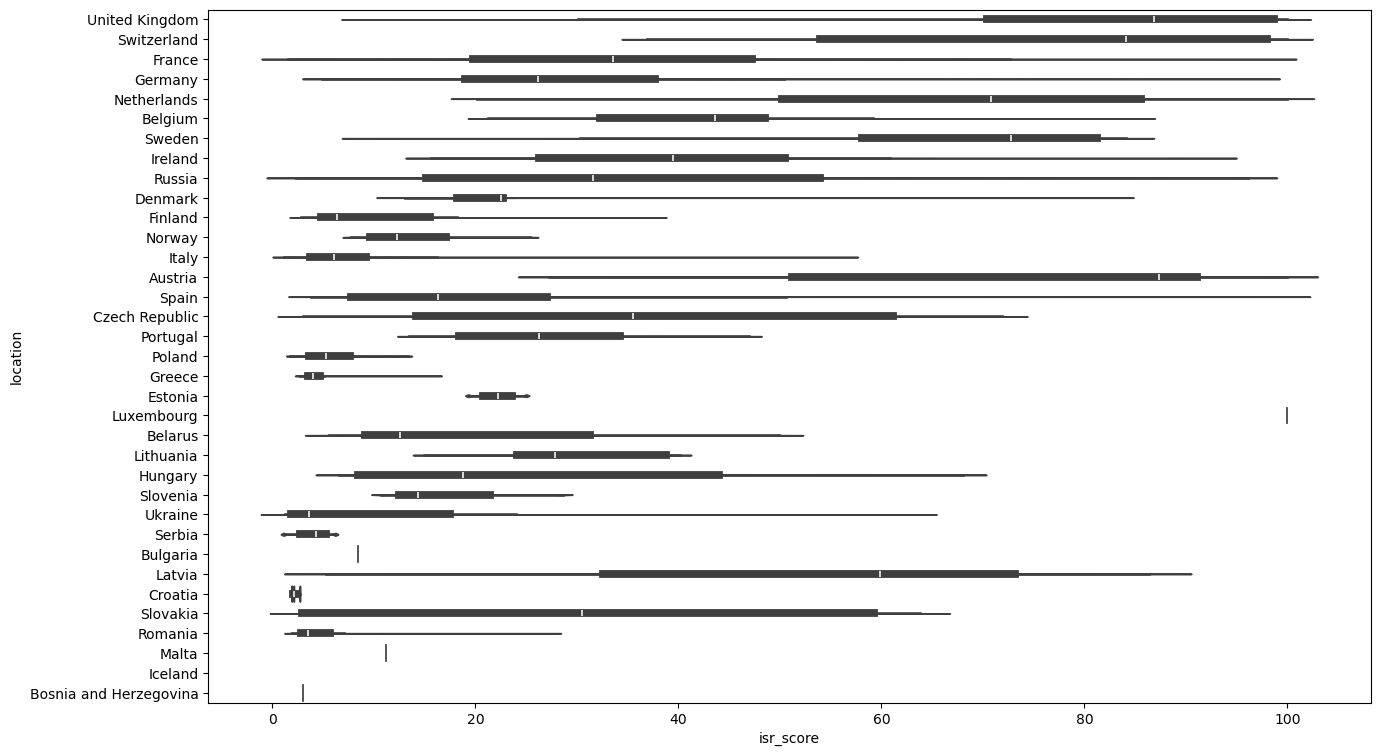

In [ ]:
fig = plt.figure(figsize=(15,9))

sns.violinplot(data=simplified.query('continent == "EU"'),
               x='isr_score', y='location', bw_method=0.05);

We can see that countries like Croatia, Romania, and Serbia generally don't have many international students, whereas countries like the UK, Switzerland and Austria generally have a lot of international students. This can suggest people who pick these high ranked universities have preferences for some countries over others.

Since the plot is so tightly packed, only the boxplot in the middle of the violins show up, but it is a neat enough graphic to include.

We can also subset our data such that only universities from a few countries of our choosing exist within it. Here the tuples of binary arrays that locate where TR and PL universities are combined with the `OR` function such that if either of the rows have these two countries it will get picked up by our final outer subset.

In [ ]:
# trpl = simplified[(simplified['location_code'] == 'TR') | (simplified['location_code'] == 'PL') ]

trpl = simplified.query('location_code == "TR" or location_code == "PL"')

<Axes: xlabel='isr_score', ylabel='location_code'>

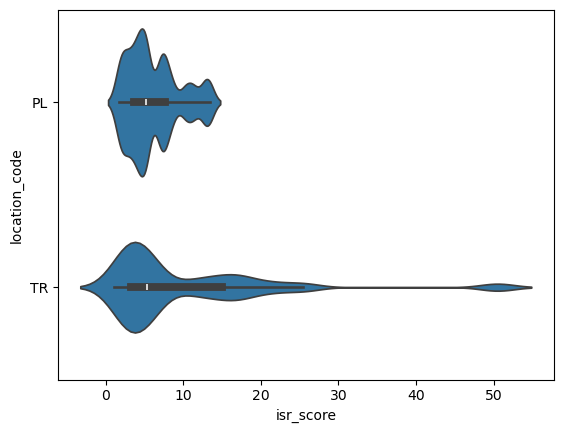

In [ ]:
sns.violinplot(data=trpl, x='isr_score', y='location_code', bw_method=0.2)

Looks like there is an outlier (or two) for Turkey in international student ratio. Let's identify which universities these are.

### **Question 3)**
How can we go about finding outliers in this subset of the data? Experiment with at least two different methods to detect outliers, compare their effectiveness, and justify your findings.  You can use [loc[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) or [query()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) to filter and display the dataset.


In [ ]:
#fill here#

Outlier Detection Using the IQR Method

In [ ]:
iqr = np.diff(
    np.quantile(trpl.isr_score, q=[.25, .75])
)[0]

mean = np.mean(trpl.isr_score)

trpl.loc[trpl.isr_score > mean + 1.5 * iqr]

# outliers_df = trpl[trpl.isr_score > mean + 1.5 * iqr]
# trpl.query('isr_score > @mean+1.5*@iqr')


,rank_display,rank_display2,institution,location_code,location,size,focus,research,age_band,status,ar_score,er_score,fsr_score,cpf_score,ifr_score,isr_score,irn_score,ger_score,sus_score,overall_score,continent
1003,951,1001.0,Yildiz Technical University,TR,Turkey,L,CO,VH,5.0,A,8.1,21.5,5.1,9.3,8.7,21.6,2.0,10.6,24.4,NaN,AS
1245,1201,1001.0,Istanbul Aydin University,TR,Turkey,L,CO,MD,2.0,B,3.7,2.8,12.1,1.4,9.5,50.5,1.0,8.4,2.4,NaN,AS
1246,1201,1201.0,Istanbul Bilgi Üniversitesi,TR,Turkey,M,FO,HI,3.0,B,4.4,4.5,12.6,2.0,6.4,25.5,1.0,10.2,2.6,NaN,AS


In [ ]:
mean+1.5*iqr

19.2936170212766

Outlier Detection Using the Standard Deviation Method

In [ ]:
mean = np.mean(trpl.isr_score)
std = np.std(trpl.isr_score)
threshold = 5

trpl.loc[np.abs(trpl.isr_score - mean) > threshold * std]



,rank_display,rank_display2,institution,location_code,location,size,focus,research,age_band,status,ar_score,er_score,fsr_score,cpf_score,ifr_score,isr_score,irn_score,ger_score,sus_score,overall_score,continent
1245,1201,1001.0,Istanbul Aydin University,TR,Turkey,L,CO,MD,2.0,B,3.7,2.8,12.1,1.4,9.5,50.5,1.0,8.4,2.4,NaN,AS


In [ ]:
threshold * std

41.62847381905077

A threshold of 5 standard deviations (5σ) is very strict and typically used in high-precision fields like physics (e.g., CERN discoveries) to avoid false positives. It only flags extreme outliers.

IQR method is robust to skewed distributions and works well when data is not normally distributed. However, STD method assumes a normal distribution and flags data points that deviate more than a certain threshold (e.g., 5 standard deviations) from the mean. It is effective when data follows a Gaussian distribution but can be sensitive to skewness.

### **Question 4)**

Out of all historic universities with more than 30k students but are not "fully comprehensive" or "comprehensive" in their subject coverage, which ones have the best sustainability score according to the QS? Use the [query()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) method to filter universities.

In [ ]:
# fill here #

In [ ]:
simplified.query('size == "XL" and age_band == 5 and focus not in ("FC","CO")').sort_values('sus_score', ascending=False)

,rank_display,rank_display2,institution,location_code,location,size,focus,research,age_band,status,ar_score,er_score,fsr_score,cpf_score,ifr_score,isr_score,irn_score,ger_score,sus_score,overall_score,continent
36,37,49.0,Technical University of Munich,DE,Germany,XL,FO,VH,5.0,A,83.9,98.2,88.8,59.6,76.5,97.3,86.7,25.0,84.8,80.0,EU
251,252,325.0,Politecnico di Torino,IT,Italy,XL,FO,VH,5.0,A,38.5,44.9,2.4,57.9,4.1,46.7,49.9,21.3,57.4,39.2,EU
175,176,208.0,Erasmus University Rotterdam,NL,Netherlands,XL,FO,VH,5.0,A,37.3,50.9,22.5,53.4,83.0,60.1,71.6,63.7,49.4,48.5,EU
383,382,501.0,Université de Montpellier,FR,France,XL,FO,VH,5.0,A,19.4,3.4,8.9,57.6,23.9,32.3,99.8,10.7,38.7,29.0,EU
468,465,521.0,University of Bordeaux,FR,France,XL,FO,VH,5.0,A,30.2,5.3,14.4,21.4,25.6,19.5,91.2,11.9,35.8,24.7,EU
122,123,139.0,Politecnico di Milano,IT,Italy,XL,FO,VH,5.0,A,69.3,71.2,5.2,48.3,63.8,56.6,75.1,36.9,29.4,55.2,EU
887,851,1001.0,University of Bucharest,RO,Romania,XL,FO,VH,5.0,A,15.5,13.8,6.5,4.2,2.8,1.9,28.7,34.7,27.8,NaN,EU
727,721,801.0,Université de Lorraine,FR,France,XL,FO,VH,5.0,A,13.7,3.6,6.4,11.4,28.9,28.4,93.1,10.2,17.2,NaN,EU
330,328,300.0,Université Paris 1 Panthéon-Sorbonne,FR,France,XL,FO,VH,5.0,A,65.2,24.9,4.2,3.4,38.2,46.4,30.0,32.2,16.3,32.6,EU
1261,1201,1201.0,Marmara University,TR,Turkey,XL,FO,VH,5.0,A,6.8,8.3,5.0,2.3,3.0,3.6,2.1,15.4,6.1,NaN,AS


We can then start looking for any columns with a symmetric distribution. Since most of the statistical analyses we will cover rely on the assumption of normality, this is an important step, although normality should be checked with statistical tests like shapiro-wilk and similar tests.

Here Quantiles-Quantiles plots of 4 variables chosen is drawn. The `line` parameter is set to "s", which tries to find a best fit line, and if none is found, it will not draw a line. Most variables chosen have a very long tail on the right, so it makes sense that many of the plots reflect this. irn score looks a bit different because it's distribution closeley resembles the uniform distribution.

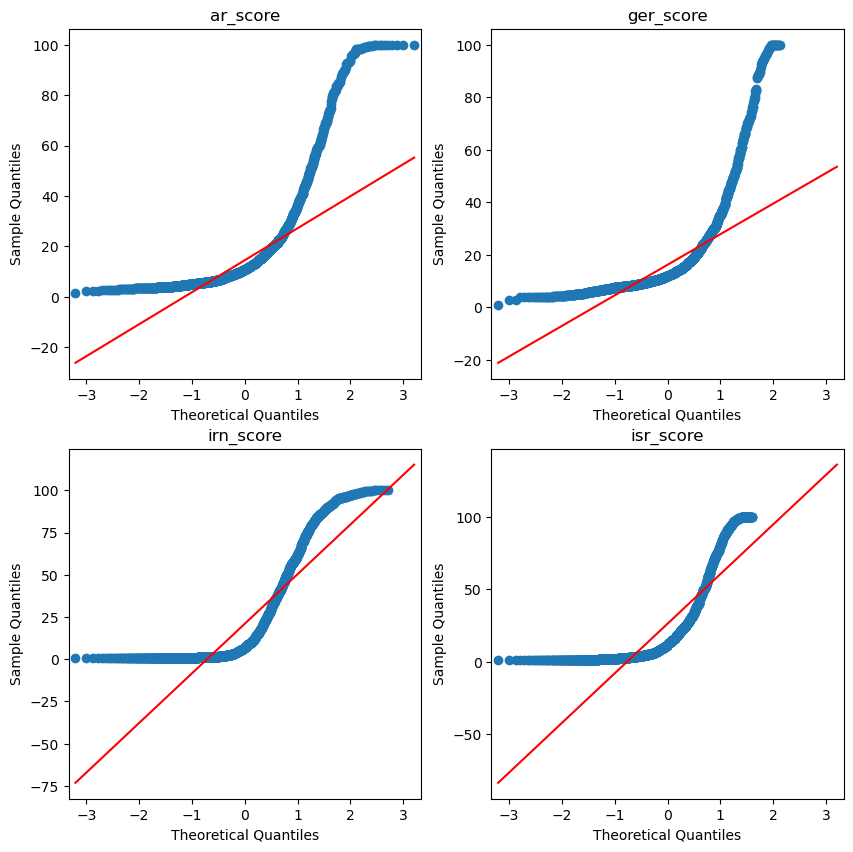

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10,10))

vars = ['ar_score', 'ger_score', 'irn_score', 'isr_score']

for i,j in zip(axes.flatten(), vars):
  sm.qqplot(simplified[j], line="q", ax=i);
  i.set_title(f'{j}')


Just to see how it is done, let's check the normality of ar score using the shapiro wilk test.

In [ ]:
stat, p = stats.shapiro(simplified['ar_score'].dropna())

print(f'Shapiro wilk statistic: {stat}\np value: {p}')

Shapiro wilk statistic: 0.7095175981521606
p value: 4.203895392974451e-45


We can easily reject the hypothesis that the values were picked from a normal distribution.

### Column to column relationships

Now that we can have a deep understanding of each column, let's see if combinations of any two column contains further information. <br>

`sns.pairplot` function does this well. <br>

Figsave has a parameter called `dpi` that changes the resolution of the output graphic. Higher dpi like 300 here implies large resolution and large file sizes.

***Make sure your graphics have appropriate colors for visibility, no overlaps, and a big figure size so details can be made out.***

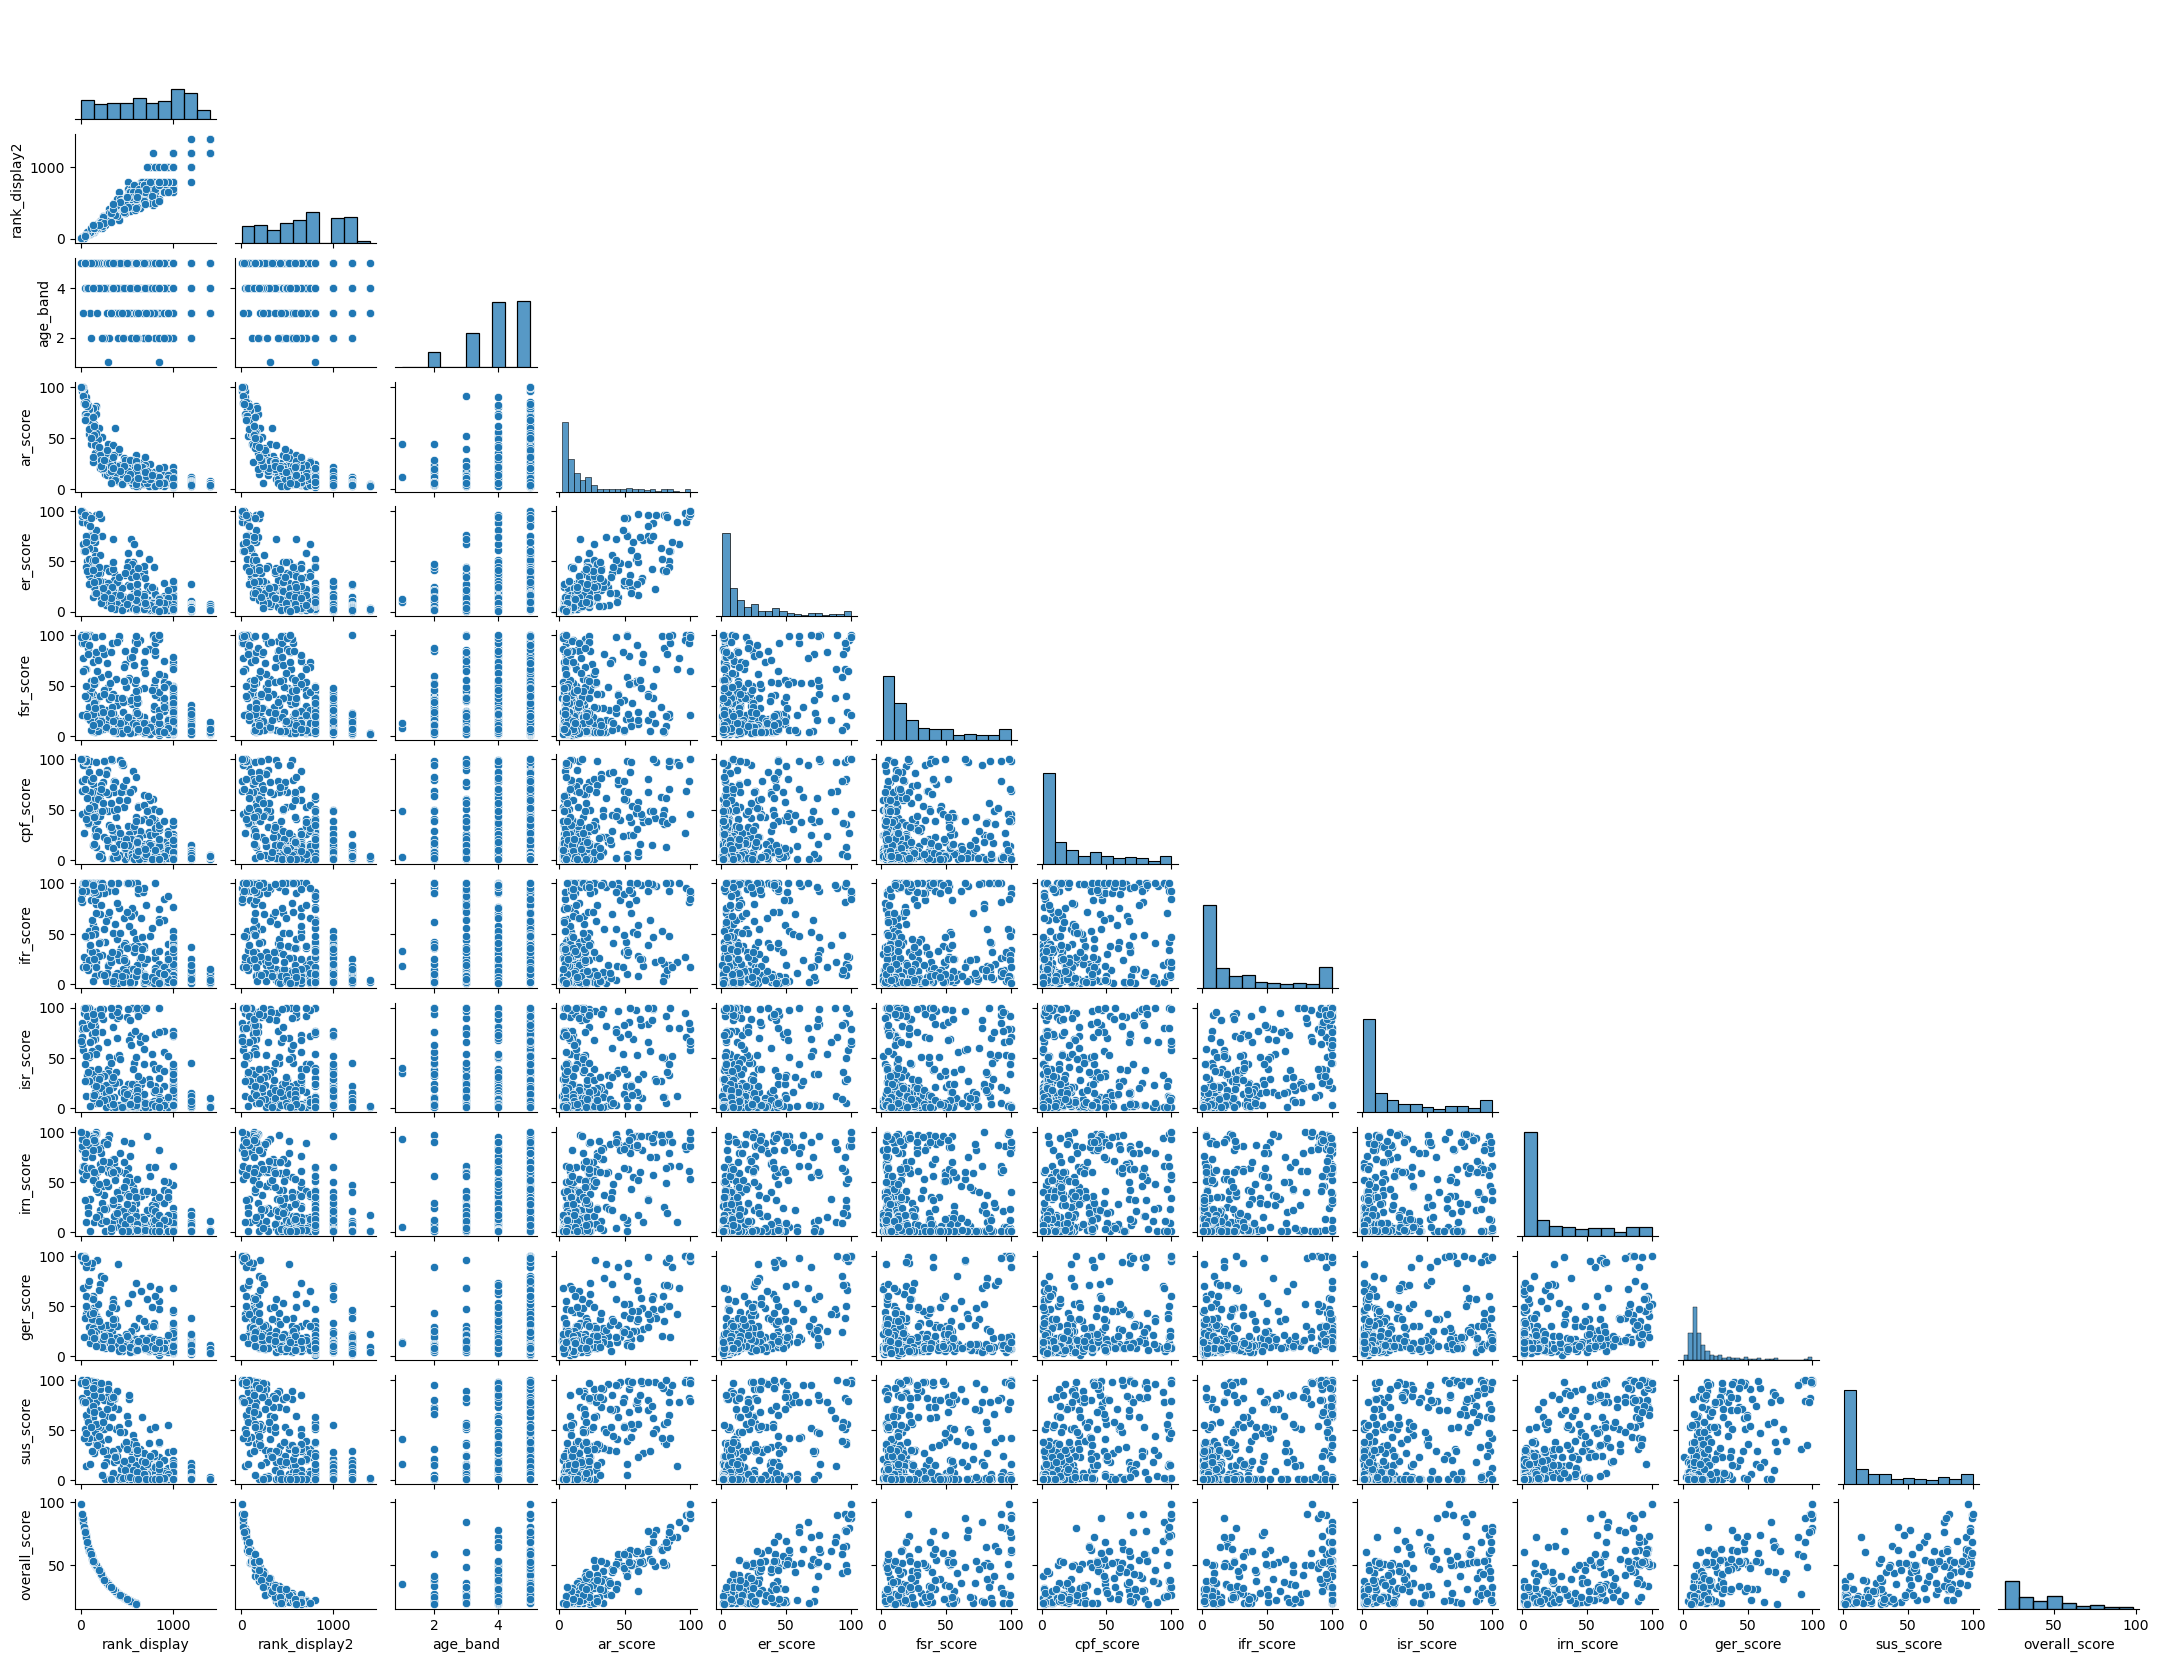

In [ ]:
sns.pairplot(simplified.sample(frac=0.3),
            corner = True, height=1.3, aspect=1.3)
# plt.savefig('plot.png', dpi=300)

### **Question 5)**
What patterns do you observe in the scatter plots? Do any variables show a strong positive or negative correlation?

> Fill here by double clicking me!

We can see how the rank variable has a strong negative relationship with ar and er scores. er score is also positively correlated with ar score, but many other pairs looks somewhat random.

### Correlations of scores with overall score

For this final part lets look at a chunk of these correlations against score only. We can compare these numbers by the percentages given in the beginning of this notebook.

We can also compute correlations with the corr method, and the default is pearson's r, however, we will use Spearman correlation instead of Pearson because the variables do not follow a normal distribution.
Correlations can only be computed for numeric attributes, so we need to subset the dataset with those columns.

In [ ]:
num_cols = [col for col,dtype in zip(simplified.columns, simplified.dtypes) if dtype!='object']
num_cols

['rank_display',
 'rank_display2',
 'ar_score',
 'er_score',
 'fsr_score',
 'cpf_score',
 'ifr_score',
 'isr_score',
 'irn_score',
 'ger_score',
 'sus_score',
 'overall_score']

We should remove rows with NaN values in relevant columns.

In [ ]:
simplified = simplified.dropna(subset=['overall_score'] + num_cols[2:-1])

In [ ]:
corrs = []
p_values = []
for col in num_cols[2:-1]:
    corr, p_val = spearmanr(simplified[col], simplified['overall_score'])
    corrs.append(corr)
    p_values.append(p_val)

corr_df = pd.DataFrame({'Variable': num_cols[2:-1], 'Spearman Correlation': corrs, 'p-value': p_values})
corr_df = corr_df.sort_values('Spearman Correlation', ascending=False).reset_index(drop=True)

corr_df



,Variable,Spearman Correlation,p-value
0,ar_score,0.851453,7.686289e-166
1,er_score,0.669869,1.483107e-77
2,sus_score,0.652087,3.008675e-72
3,ger_score,0.648790,2.650212e-71
4,irn_score,0.580587,4.165426e-54
5,cpf_score,0.539767,1.290955e-45
6,isr_score,0.371570,1.266654e-20
7,ifr_score,0.361134,1.717188e-19
8,fsr_score,0.271134,2.474453e-11


## P-Value Issue and Multiple Testing Correction
### **Question 6)**
If we conduct multiple statistical tests on different variables, how does this affect the reliability of our p-values?



> Fill here by double clicking me!


A p-value represents the probability that the observed results occurred by chance. In hypothesis testing, a p-value below 0.05 is typically considered statistically significant. However, when performing multiple comparisons (e.g., calculating correlations for many variables), these p-values can become misleading.  

Imagine we compute correlations for 10 different variables in a dataset. If we use a significance threshold (α) of 0.05 for each test, the probability of finding at least one false positive result increases significantly:  

- If we conduct one test, the probability of a false positive is 5% (0.05).  
- If we conduct 10 tests, the probability of finding at least one false positive rises to:  

    $1 - (1 - 0.05)^{10} \approx 40\%$

This inflation in error rate means we may detect correlations that appear significant but are actually due to random chance. To address this, multiple testing corrections are necessary.


 First, we apply the Bonferroni correction.

In [ ]:
corrected_pvals = multipletests(corr_df['p-value'], method='bonferroni')[1]
corr_df['Bonferroni Corrected p-value'] = corrected_pvals


However, Bonferroni correction is very strict, increasing the risk of Type II errors. As an alternative, we also apply the Benjamini-Hochberg (FDR) and Holm corrections.

In [ ]:
bh_corrected_pvals = multipletests(corr_df['p-value'], method='fdr_bh')[1]
holm_corrected_pvals = multipletests(corr_df['p-value'], method='holm')[1]

corr_df['Benjamini-Hochberg Corrected p-value'] = bh_corrected_pvals
corr_df['Holm Corrected p-value'] = holm_corrected_pvals
corr_df


,Variable,Spearman Correlation,p-value,Bonferroni Corrected p-value,Benjamini-Hochberg Corrected p-value,Holm Corrected p-value
0,ar_score,0.851453,7.686289e-166,6.917660e-165,6.917660e-165,6.917660e-165
1,er_score,0.669869,1.483107e-77,1.334796e-76,6.673982e-77,1.186486e-76
2,sus_score,0.652087,3.008675e-72,2.707808e-71,9.026026e-72,2.106073e-71
3,ger_score,0.648790,2.650212e-71,2.385191e-70,5.962978e-71,1.590127e-70
4,irn_score,0.580587,4.165426e-54,3.748883e-53,7.497767e-54,2.082713e-53
5,cpf_score,0.539767,1.290955e-45,1.161859e-44,1.936432e-45,5.163819e-45
6,isr_score,0.371570,1.266654e-20,1.139989e-19,1.628555e-20,3.799962e-20
7,ifr_score,0.361134,1.717188e-19,1.545469e-18,1.931837e-19,3.434376e-19
8,fsr_score,0.271134,2.474453e-11,2.227008e-10,2.474453e-11,2.474453e-11




1. Strong correlation (Absolute Spearman Correlation	 > 0.6)
   - `ar_score` (0.85), `er_score` (0.67), `sus_score` (0.65), `ger_score` (0.65)  
   - These variables have a strong positive monotonic relationship with `overall_score`.  
   - Higher values in these variables strongly correspond to higher `overall_score`. <br> <br>
2. Weak correlation (Absolute Spearman Correlation	 < 0.3)  
   - `fsr_score` (0.27)  
   - This variable has the weakest correlation with `overall_score`.  
   - Changes in `fsr_score` have little impact on the overall score.<br><br>

3. Statistical significance (p-value)
   - All p-values are extremely low (< 10⁻¹⁰), meaning all correlations are highly statistically significant.  
   - This confirms that these correlations are not due to random chance.  


# Comparison with Assigned Percentages
Predefined percentage values are used to compare with observed correlations. One thing to realize here is we are using the reset_index method to save the index as another column. This is then used to color each bar in the barplot below.

In [ ]:

perc = pd.Series([0.3, 0.15, 0.1, 0.2, 0.05, 0.05, 0.05, 0.05, 0.05], index=num_cols[2:-1])
perc_df = perc.sort_index().reset_index()
perc_df.columns = ['Variable', 'Percentage']


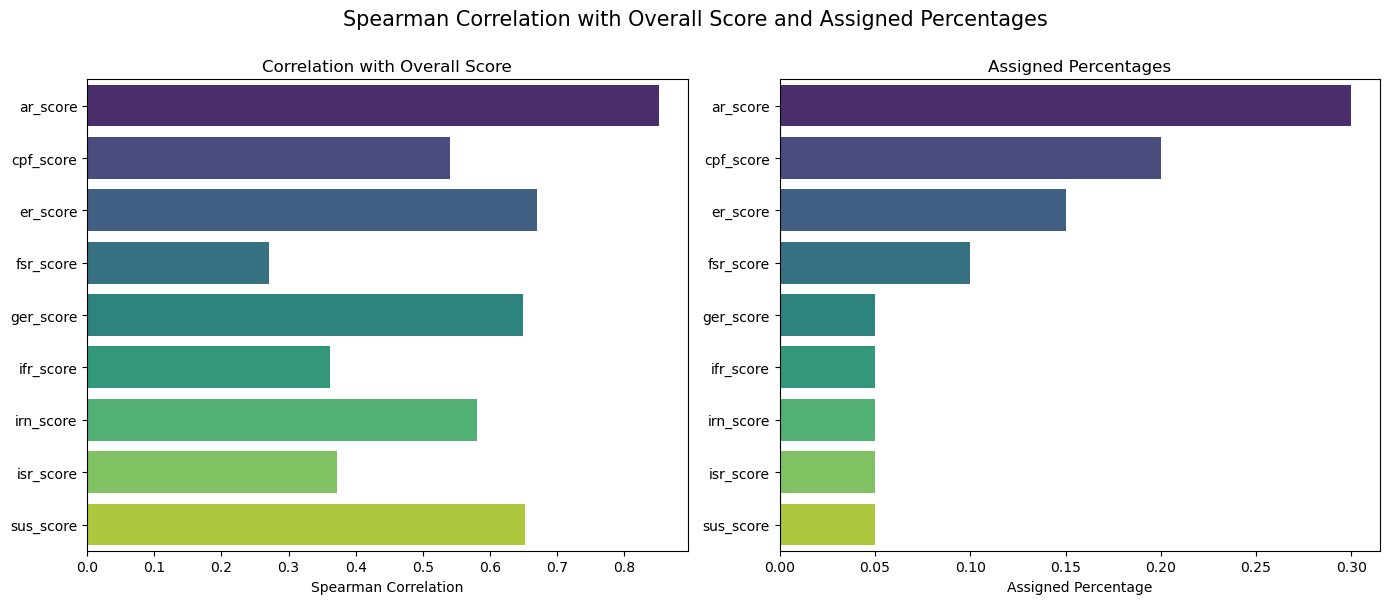

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Spearman Correlation with Overall Score and Assigned Percentages', size=15, y=1)

ordered_variables = perc_df['Variable'].tolist()
corr_df = corr_df.set_index('Variable').loc[ordered_variables].reset_index()

sns.barplot(y='Variable', x='Spearman Correlation', orient='h', data=corr_df, ax=axes[0], hue='Variable', palette="viridis", legend=False)
axes[0].set_xlabel('Spearman Correlation')
axes[0].set_ylabel('')
axes[0].set_title('Correlation with Overall Score')

sns.barplot(y='Variable', x='Percentage', orient='h', data=perc_df, ax=axes[1], hue='Variable', palette="viridis", legend=False)
axes[1].set_xlabel('Assigned Percentage')
axes[1].set_ylabel('')
axes[1].set_title('Assigned Percentages')

plt.tight_layout()
plt.show()


Despite the claim of the authors, we find some columns like sus score, ger score and irn score to highly correlate with overall score. This doesn't automatically mean there is an additive effect though. For that we'd need to create a regression model and check how much each attribute contributes to the variation of the score.